In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd  drive/MyDrive/'Colab Notebooks'/'loan pridiction dataset'/

/content/drive/MyDrive/Colab Notebooks/loan pridiction dataset


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
orginal_df=pd.read_csv('train_ctrUa4K.csv')
orginal_test=pd.read_csv('test_lAUu6dG.csv')
sample_submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [6]:
orginal_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
orginal_df.shape

(614, 13)

In [8]:
orginal_test.shape

(367, 12)

In [9]:
orginal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Observation
* two classes (y,n ) that mean that was classification problem, & we use evaluation classification matrixs.
* we had few catgorical coloumns we avoid it but can't becuase may be that  data importent for use we convert into integer `[Gender,Married, Education, self_employes, Property_Area]`  

* **before that stuf we just do EDA (Explotry Data Analysis) on row Data**
[if we just modify data before EDA how we now we colume need more attention!!]



# EDA is fun
asking question to Dataset


In [10]:
print('there is columes number of unique values')
print('column name |    no. unique values')
for i in orginal_df.columns:
    print(f'{i}  -->  {orginal_df[i].nunique()}')

there is columes number of unique values
column name |    no. unique values
Loan_ID  -->  614
Gender  -->  2
Married  -->  2
Dependents  -->  4
Education  -->  2
Self_Employed  -->  2
ApplicantIncome  -->  505
CoapplicantIncome  -->  287
LoanAmount  -->  203
Loan_Amount_Term  -->  10
Credit_History  -->  2
Property_Area  -->  3
Loan_Status  -->  2


In [11]:
orginal_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### How many Married person in dataset??

In [12]:
orginal_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

### how many people clear own loans

In [13]:
orginal_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

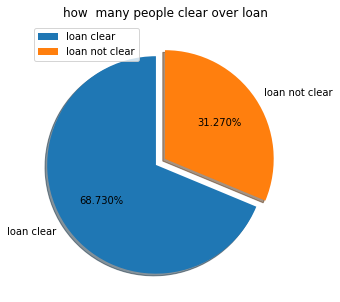

In [14]:

fig=plt.figure(figsize=(10,5))
ax=plt.axis()
plt.pie(orginal_df['Loan_Status'].value_counts(),labels=['loan clear', 'loan not clear'],explode =[0.1,0,],autopct='%1.3f%%',shadow=True,startangle=90)
plt.title('how  many people clear over loan')
plt.legend()
plt.show()

### How Many Males & Females

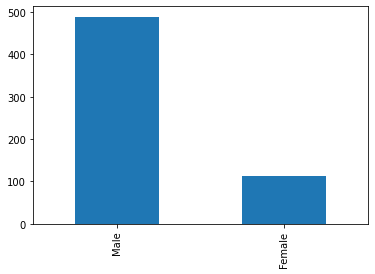

In [33]:
orginal_df['Gender'].value_counts().plot(kind='bar')
plt.show()

### how many Graduate people?

In [16]:
orginal_df['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### how many people was self Employed

In [17]:
orginal_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

### how many properties in rules, Semiurban & urban

In [18]:
orginal_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### how many loan statuts Y/N married person or unmarried person   ?

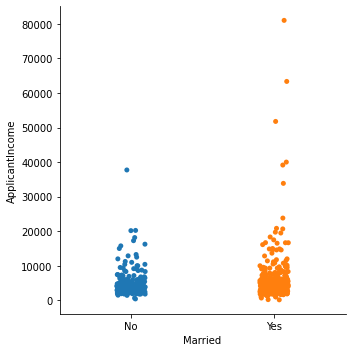

In [31]:
sns.catplot(x="Married", y='ApplicantIncome', data=orginal_df)


In [42]:
 sns.catplot(pd.DataFrame(orginal_df.groupby('Married')['Loan_Status'].value_counts()))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [19]:
u=['Married','Property_Area','Self_Employed','Education','Gender']

In [20]:
for i in u:
    print(orginal_df.groupby(i)['Loan_Status'].value_counts(),'\n','-'*40)

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64 
 ----------------------------------------
Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64 
 ----------------------------------------
Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64 
 ----------------------------------------
Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64 
 ----------------------------------------
Gender  Loan_St

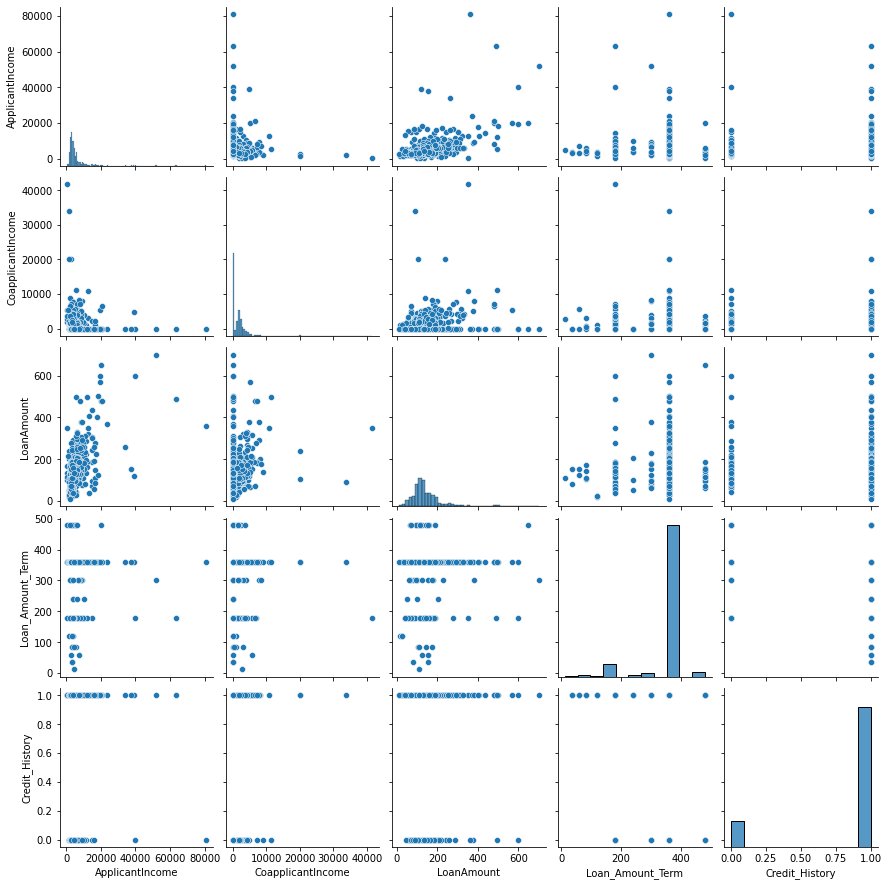

In [21]:
sns.pairplot(orginal_df)

In [35]:
orginal_df[['Loan_Status','Married']].plot.bar()

TypeError: ignored

In [ ]:
Property_Area

In [ ]:
plt.bar(orginal_df['Loan_Status'].value_counts())

In [ ]:
plt.bar(orginal_df.groupby('Married')['Loan_Status'].value_counts())

In [ ]:
orginal_df['Married'].unique()

* we, have few null values let's clean it
# Data Cleaning